# Computer Vision Demo

This workbook walks through...

In [1]:
%load_ext autoreload
%autoreload 1
%aimport src.config
%aimport src.data
%aimport src.model
%aimport src.loss_function
%aimport src.optimizer
%aimport src.pipeline


LOG_DIR = src.config.LOG_DIR  # type: ignore
DEVICE = src.config.DEVICE  # type: ignore

Data = src.data.Data  # type: ignore
Model = src.model.Model  # type: ignore
LossFunction = src.loss_function.LossFunction  # type: ignore
Optimizer = src.optimizer.Optimizer  # type: ignore
Pipeline = src.pipeline.Pipeline  # type: ignore

Using cuda device


Import dependencies.

Define hyperparameters.

In [2]:
BATCH_SIZE = 32
LEARNING_RATE = 1e-3
EPOCHS = 10

Instantiate TensorBoard for observability.

In [3]:
import os
import time

from torch.utils.tensorboard import writer

timestamp = str(int(time.time()))

summary_writer = writer.SummaryWriter(os.path.join(LOG_DIR, timestamp, "tensorboard"))

Visualize our dataset. Images are also sent to TensorBoard.

Source: https://github.com/zalandoresearch/fashion-mnist

Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /home/xaoz/workspace/cv_demo/src/../data
    Split: Train
    StandardTransform
Transform: Compose(    ToTensor())

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /home/xaoz/workspace/cv_demo/src/../data
    Split: Test
    StandardTransform
Transform: ToTensor()

Feature batch shape: torch.Size([32, 1, 28, 28])

Labels batch shape: torch.Size([32])

Classes: ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

First batch examples in image below.


/home/xaoz/workspace/cv_demo/.venv/lib/python3.12/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


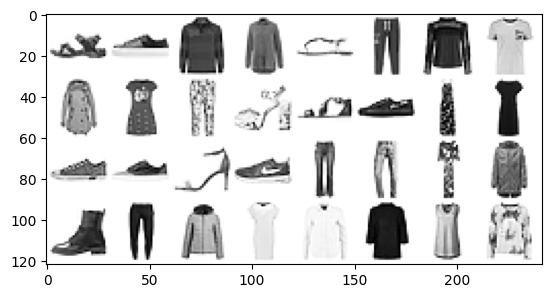

In [4]:
data = Data(batch_size=BATCH_SIZE, summary_writer=summary_writer)
data.get_data()
data.inspect_data()

Prepare our model, loss function, optimizer and training pipeline.

In [5]:
model = Model().to(DEVICE)
loss_fn = LossFunction()
optimizer = Optimizer(model.parameters(), lr=LEARNING_RATE)

pipeline = Pipeline(data, model, loss_fn, optimizer, summary_writer)

Train and evaluate the model.

In [6]:
pipeline.process(epochs=EPOCHS)

Epoch: 1

Training batch 100 loss: 2.2991
Training batch 200 loss: 2.2843
Training batch 300 loss: 2.2720
Training batch 400 loss: 2.2589
Training batch 500 loss: 2.2460
Training batch 600 loss: 2.2322
Training batch 700 loss: 2.2157
Training batch 800 loss: 2.2045
Training batch 900 loss: 2.1868
Training batch 1000 loss: 2.1703
Training batch 1100 loss: 2.1484
Training batch 1200 loss: 2.1276
Training batch 1300 loss: 2.1087
Training batch 1400 loss: 2.0802
Training batch 1500 loss: 2.0576
Training batch 1600 loss: 2.0291
Training batch 1700 loss: 2.0009
Training batch 1800 loss: 1.9680
Test Error: 
 Accuracy: 57.8%, Avg loss: 1.924508 

Epoch: 2

Training batch 1975 loss: 1.8992
Training batch 2075 loss: 1.8669
Training batch 2175 loss: 1.8323
Training batch 2275 loss: 1.7861
Training batch 2375 loss: 1.7507
Training batch 2475 loss: 1.7072
Training batch 2575 loss: 1.6679
Training batch 2675 loss: 1.6227
Training batch 2775 loss: 1.5758
Training batch 2875 loss: 1.5499
Training batc

Demonstrate inference.

In [7]:
import torch
from torch.utils.data import RandomSampler

model.eval()

sampler = RandomSampler(data.test.dataset, replacement=True, num_samples=10)
for i in sampler:
    test_input, label = data.test.dataset[i][0], data.test.dataset[i][1]

    with torch.no_grad():
        test_input = test_input.to(DEVICE)

        prediction = model(test_input)
        predicted_class, actual_class = (
            data.classes[prediction[0].argmax(0)],
            data.classes[label],
        )
        print(
            f'{'✔' if predicted_class == actual_class else '❌'} - Predicted: "{predicted_class}", Actual: "{actual_class}"'
        )

✔ - Predicted: "Pullover", Actual: "Pullover"
❌ - Predicted: "Shirt", Actual: "Coat"
❌ - Predicted: "Shirt", Actual: "Dress"
❌ - Predicted: "Pullover", Actual: "Coat"
❌ - Predicted: "Ankle Boot", Actual: "Sandal"
❌ - Predicted: "Shirt", Actual: "Dress"
✔ - Predicted: "Bag", Actual: "Bag"
✔ - Predicted: "Trouser", Actual: "Trouser"
✔ - Predicted: "Pullover", Actual: "Pullover"
✔ - Predicted: "Sneaker", Actual: "Sneaker"
